In [17]:
#imports
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [6]:
path_to_dataset = os.path.join("..", "test_data", "1_test_split_set")

path_to_dataset_train = os.path.join(path_to_dataset, "train")
path_to_dataset_test = os.path.join(path_to_dataset,  "test")
path_to_dataset_val = os.path.join(path_to_dataset,   "val")


#path_to_mini_dataset= os.path.join("..", "test_data", "0_test_miniset")#, "0_test_miniset")

batch_size = 16 #None #16 #32
img_height = 224
img_width = 224

X_train_ds = image_dataset_from_directory(
  path_to_dataset_train,
  #validation_split=0.2,
  #subset="training",
  label_mode="int",
  color_mode="rgb",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9308 files belonging to 21 classes.


In [9]:
X_val_ds = image_dataset_from_directory(
    path_to_dataset_val,
    # validation_split=0.2,
    # subset="validation",
    label_mode="int",
    color_mode="rgb",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

X_test_ds = image_dataset_from_directory(
    path_to_dataset_test,
    # validation_split=0.2,
    # subset="validation",
    label_mode="int",
    color_mode="rgb",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

#images = image_dataset_from_directory(path_to_dataset, )

Found 1063 files belonging to 21 classes.
Found 1063 files belonging to 21 classes.


In [10]:
count = 0
test_image, test_label = None, None

for image, label in X_train_ds.take(1):
    if count == 0 :
        test_image = image.numpy()
        test_label = label.numpy()
    count+=1
    if count > 0: break
print("test label shape: ", test_label.shape)
print("test label:", test_label)
print("image shape:" ,test_image.shape)

test label shape:  (16,)
test label: [ 5  4  2  8  2 15  3  4  9  3  4  5  4  2  4  9]
image shape: (16, 224, 224, 3)


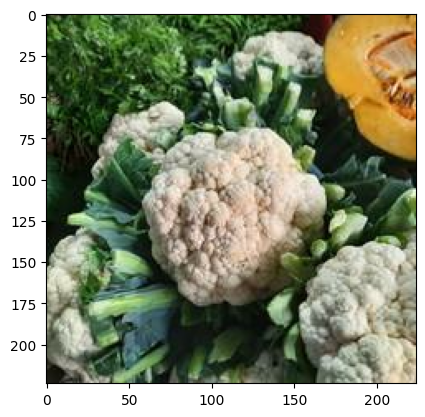

In [11]:
plt.imshow(test_image[0]/255)


In [12]:
X_train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
#getting label out?

test_image.shape
#test_label

(16, 224, 224, 3)

## CNN

### prepare + initial declarations


In [14]:
in_shape = test_image[0].shape
in_shape

(224, 224, 3)

In [15]:
num_classes = len(X_train_ds.class_names)
num_classes

21

### Declare model

In [18]:
model = models.Sequential()

#normalise the inputs
model.add(layers.Rescaling(1./255))

#first convolutional layer - big kernels, few filters
model.add(layers.Conv2D(16, kernel_size=(5,5), padding="same", activation="relu", input_shape=in_shape))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#second conv layer
model.add(layers.Conv2D(32, kernel_size=(4,4), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#third conv layer
model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten
model.add(layers.Flatten())

#Dense layers - do we regularise the kernels?!
model.add(layers.Dense(64, activation="relu"))#, kernel_regularizer=reg_l1_l2))
model.add(layers.Dropout(0.2) )
model.add(layers.Dense(32, activation="relu"))#, kernel_regularizer=reg_l1_l2))
model.add(layers.Dropout(0.2) )
model.add(layers.Dense(16, activation="relu"))#, kernel_regularizer=reg_l1_l2))
model.add(layers.Dropout(0.2) ) 

#Last layer, convert for appropriate model output
model.add(layers.Dense(num_classes, activation="softmax"))


In [19]:
#Compile model

#loss could be sparse cat crossentropy?
#https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy

loss = "sparse_categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

#prep for early stopping
es = EarlyStopping(patience=20, restore_best_weights=True)


In [20]:
#fit model
model.fit(
        X_train_ds, 
        validation_data=X_val_ds, 
        epochs=50, 
        callbacks=[es], 
        verbose=1
    )

Epoch 1/50
582/582 [==============================] - 19s 27ms/step - loss: 2.0465 - accuracy: 0.3336 - val_loss: 3.0657 - val_accuracy: 0.1844
Epoch 2/50
 84/582 [===>..........................] - ETA: 11s - loss: 1.5294 - accuracy: 0.5082

KeyboardInterrupt: 

data  models  notebooks  snap  src  tutorials


In [37]:
! mkdir ../models

In [39]:
ls ..

data/  models/  notebooks/  snap/  src/  tutorials/


In [61]:

def save_model(model, model_name):
    path_to_models = os.path.join("..","models")
    
    if not model_name:
        print("please give the model a name! #goodpractice")
        return None
    
    model_path = os.path.join(path_to_models, model_name)
    model.save(model_path)
    
    return f"model saved in {path_to_models} as {model_name}"


In [62]:
save_model(model, "first_model_on_21_classes")

INFO:tensorflow:Assets written to: ../models/first_model_on_21_classes/assets


'model saved in ../models as first_model_on_21_classes'